#Polynomial (Linear) Regression

###  Regression types
<a id='regressions'></a>
so far we learned 2 regression types:
1. Simple linear regression (SLR) : $y = b_0 + b_1x_1$
2. Multiple linear regression : $y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$
<br><br>

And today we'll cover the third type: 
3. polynomial linear regression : $y = b_0 + b_1x_1 + b_2x_1^2 + ... + b_nx_1^n$

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.graph_objects as go

**import sklearn library for linear and polynomial models**


In [ ]:
# import library
from sklearn.linear_model import LinearRegression

**Load the dataset**

In [ ]:
cars_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/cars93.csv')

# Know your data


In [ ]:
cars_df.head()

,mpg,cylinders,engine_power,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,US,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,US,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,US,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,US,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,US,"""ford torino"""


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   engine_power  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    object 
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:

df=pd.DataFrame(cars_df, columns=['mpg','weight','engine_power','acceleration', 'origin', 'year'])
df.head()

,mpg,weight,engine_power,acceleration,origin,year
0,18.0,3504,307.0,12.0,US,70
1,15.0,3693,350.0,11.5,US,70
2,18.0,3436,318.0,11.0,US,70
3,16.0,3433,304.0,12.0,US,70
4,17.0,3449,302.0,10.5,US,70


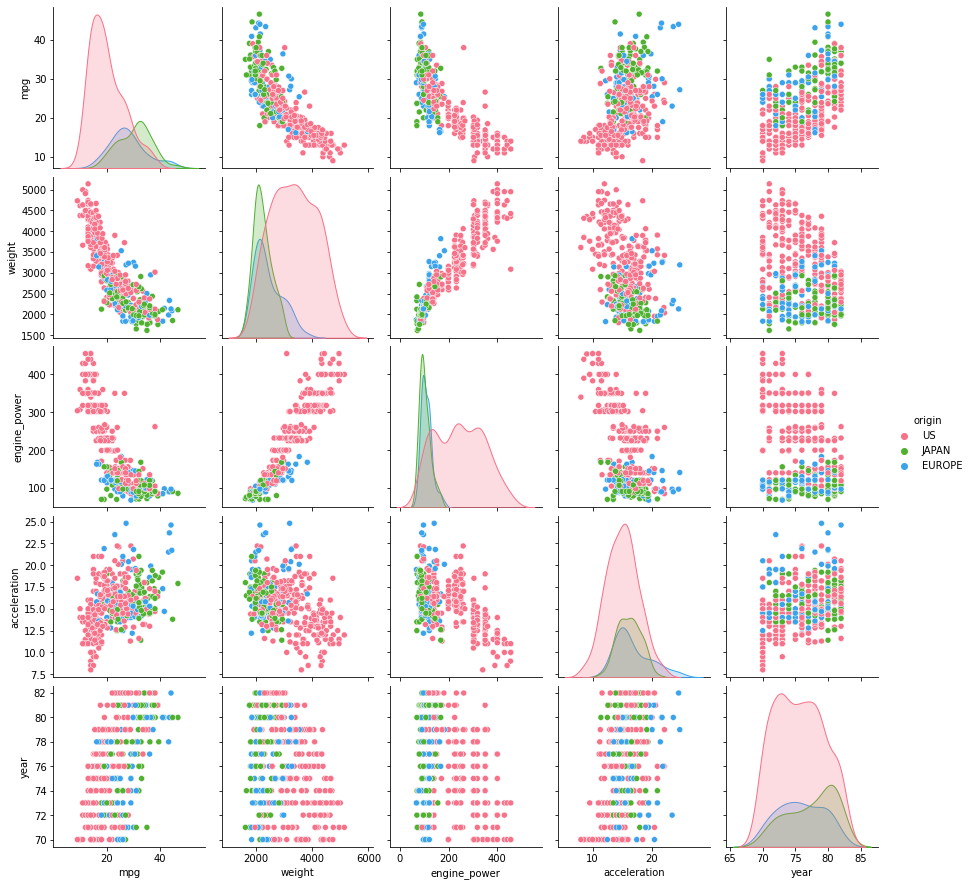

In [ ]:
sns.pairplot(df, hue='origin', palette='husl')

In [ ]:
corr_df = df.corr()
corr_df

,mpg,weight,engine_power,acceleration,year
mpg,1.000000,-0.831741,-0.804203,0.420289,0.579267
weight,-0.831741,1.000000,0.932824,-0.417457,-0.306564
engine_power,-0.804203,0.932824,1.000000,-0.543684,-0.370164
acceleration,0.420289,-0.417457,-0.543684,1.000000,0.288137
year,0.579267,-0.306564,-0.370164,0.288137,1.000000


##Our Goal
To build a polynomial regression model that can predict the MPG of a car given it's weight.

In [ ]:
#set your X and y
X = df[['weight']]
y = df.mpg



In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
test_df.head(10)


,weight,mpg
40,4154,14.0
44,5140,13.0
298,3900,23.0
59,2254,23.0
270,2515,21.1
205,2155,28.0
222,4060,17.0
268,2300,27.2
7,4312,14.0
162,3730,15.0


In [ ]:
#scale the sets
from sklearn.preprocessing import MinMaxScaler

x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_test_scaler.fit_transform(X_test)
y_train_scaled = y_train_scaler.fit_transform(pd.DataFrame(y_train))
y_test_scaled = y_test_scaler.fit_transform(pd.DataFrame(y_test))


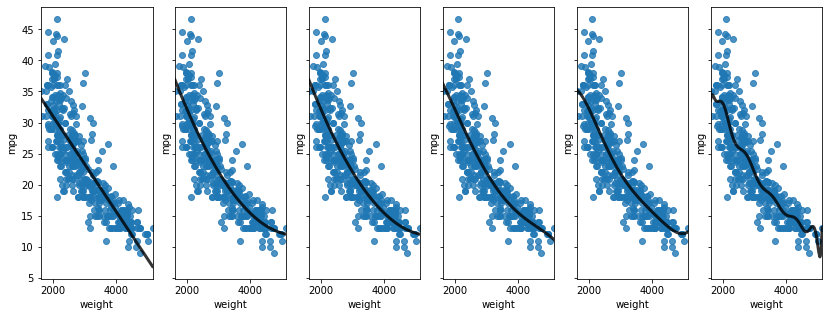

In [ ]:
#### Plotting 6 degrees of regression trend lines using subplot and regplot

# linear vs polynomial trend line
fig, axs = plt.subplots(ncols=6, sharex=True, sharey=True ,figsize=(14,5))
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=1,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[0])
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=2,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[1])
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=3,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[2])
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=4,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[3])
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=5,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[4])
sns.regplot(x='weight', y='mpg', data=cars_df, ci=None, order=13,line_kws={"color":"k","alpha":0.8,"lw":3},ax=axs[5])


By Looking at the graphs it's hard to tell which model degree fits the data better

Is it the 2nd? 3rd? or maybe the 4th degree graphs?

Which of the models plotted is overfitted? underfitted? 

## Creating and fitting the 2nd degree model with SKLearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

#fit the x variable to fit a 2rd degree polynomial value
X_poly = poly.fit_transform(X_train_scaled)
poly.fit(X_poly, y_train_scaled)

pol_lin_reg = LinearRegression()
pol_lin_reg.fit(X_poly, y_train_scaled)

#predict the training data

y_train_pred_scaled = pol_lin_reg.predict(poly.fit_transform(X_train_scaled))
y_train_pred = y_train_scaler.inverse_transform(y_train_pred_scaled)

#create a pandas series of the results
y_train_pred = round(pd.Series(y_train_pred[:,0], index=y_train.index, name='predicted_mpg'),ndigits=2)

#Add the results to the DF
train_df = pd.merge(left=train_df, right=y_train_pred , left_index=True, right_index=True)

train_df.head()


,weight,mpg,predicted_mpg
42,4955,12.0,12.26
0,3504,18.0,18.12
198,1795,33.0,34.93
370,2575,31.0,25.93
227,3630,19.0,17.31


##Plot the model

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        y=train_df.mpg, 
        x=train_df.weight,
        mode='markers',
        marker_color='green',
        marker_size=4,
        name='Actual mpg')
      )
fig.add_trace(go.Scatter(
        y=test_df.mpg, 
        x=test_df.weight,
        mode='markers',
        marker_color='orange',
        marker_size=4,
        name='Actual mpg')
      )
fig.add_trace(go.Scatter(
        y=train_df.predicted_mpg, 
        x=train_df.weight,
        mode='markers',
        marker_color='red',
        marker_size=4,
        name='Predicted mpg')
      )
fig.show()


#Evaluation metrics - How good did our model do in predicting the target?

##What are Evaluation Metrics?
Evaluation metrics are used to measure the quality of the statistical or machine learning model. Evaluating machine learning models or algorithms is essential for any project. There are many different types of evaluation metrics available to test a model. 

##Why is it useful

It is very important to use multiple evaluation metrics to evaluate your model. This is because a model may perform well using one measurement from one evaluation metric, but may perform poorly using another measurement from another evaluation metric. Using evaluation metrics are critical in ensuring that your model is operating correctly and optimally. 



##Use the Test set on your model
It's time to use your python skills and test the model. Let's predict the mpg depending on the test set.

#Excersize
1. Test the model - predict the mpg by providing the test data set.
2. Add the predictionds to the test DF
3. Evaluate the model's performance  

In [ ]:

#predict the test data

y_test_pred_scaled = pol_lin_reg.predict(poly.fit_transform(X_test_scaled))
y_test_pred = y_test_scaler.inverse_transform(y_test_pred_scaled)

#create a pandas series of the results
y_test_pred = round(pd.Series(y_test_pred[:,0], index=y_test.index, name='predicted_mpg'),ndigits=2)

#Add the results to the DF
test_df = pd.merge(left=test_df, right=y_test_pred , left_index=True, right_index=True)

test_df.head()


,weight,mpg,predicted_mpg
40,4154,14.0,15.40
44,5140,13.0,13.42
298,3900,23.0,16.28
59,2254,23.0,25.62
270,2515,21.1,23.72


##Method 1: Residual Analysis
In residual analysis we are examining the error margin of the model. A smaller error means a better model

In [ ]:
#calculate the residuals
train_df['residuals'] = train_df.predicted_mpg - train_df.mpg
test_df['residuals'] = test_df.predicted_mpg - test_df.mpg


In [ ]:
#plot the residuals graph
fig= go.Figure()
fig.add_trace(
    go.Scatter(
        x=train_df.predicted_mpg,
        y=train_df.residuals,
        mode='markers',
        name='train residuals',
        marker_color='blue',
        marker_size=2.5,
        marker_line_width=0,

    )
)
fig.add_trace(
  go.Scatter(
      x=test_df.predicted_mpg,
      y=test_df.residuals,
      mode='markers',
      name='test residuals',
      marker_color='red',
      marker_size=2.5,
      marker_line_width=0,

  )
)

fig.add_trace(
  go.Scatter(
      x=train_df.predicted_mpg,
      y=train_df.residuals*0,
      mode='lines',
      name='zero line',
      marker_color='black',
      marker_size=1.5,
      marker_line_width=0,

  )
)
fig.update_layout(
    title="Residuals of Predicted prices",
    xaxis_title="Predicted MPG",
    yaxis_title="Residuals",
    font=dict(
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

what would a near perfect model would look like?


##  Method 2: Cost functions metrics

Here are three common **cost functions** **evaluation** metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.



In [ ]:
from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(train_df.mpg, train_df.predicted_mpg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.mpg, train_df.predicted_mpg)))
print("MAE:",metrics.mean_absolute_error(train_df.mpg, train_df.predicted_mpg))

------ TRAIN DATA ------
MSE: 17.733641726618707
RMSE: 4.21113306921293
MAE: 3.135323741007194


In [ ]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(test_df.mpg, test_df.predicted_mpg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.mpg, test_df.predicted_mpg)))
print("MAE:",metrics.mean_absolute_error(test_df.mpg, test_df.predicted_mpg))

------ TEST DATA ------
MSE: 22.737055833333333
RMSE: 4.768338896652935
MAE: 3.47925


when the test metrics are significally worse than the train metrics we state that the model is overfitted - is this the case here?

## Method 3: Coefficient of determination, $R^2$
<a id='r'></a>

**$R^2$** is the proportion of the **variance** in the dependent variable that is predictable from the independent variable(s).
$$R^2 = 1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2} = 1-\frac{SSE}{SST}$$

SSE: Sum of Squared Errors
<br>
SST: Total Sum of Squares


In [ ]:
#get R2 for train set
from sklearn.metrics import r2_score
r2_score(train_df.mpg, train_df.predicted_mpg)

0.7140560476588593

In [ ]:
#get R2 for test set
r2_score(test_df.mpg, test_df.predicted_mpg)

0.6108449187538807